In [1]:
!pip install -U scipy
!pip install -U numba
!pip install -U numpy
!pip install -U jinja2
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U scikit-learn
!pip install imbalanced-learn -q
!pip install shap -q 
!pip install phik -q

In [2]:
def setup_environment():
    required_packages = {
        'phik': 'phik',
        'shap': 'shap',
        'sklearn': 'scikit-learn'
    }
    
    for import_name, package_name in required_packages.items():
        try:
            __import__(import_name)
            print(f"{package_name} уже установлен")
        except ImportError:
            print(f"⏳ Устанавливаем {package_name}...")
            !pip install -q {package_name}
            print(f"{package_name} успешно установлен")
    
    print("\nВсе зависимости готовы к работе!")

# Вызов функции при старте ноутбука
setup_environment()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found

phik уже установлен
shap уже установлен
scikit-learn уже установлен

Все зависимости готовы к работе!


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (RandomizedSearchCV,
                                     train_test_split)
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   RobustScaler, 
                                   MinMaxScaler, 
                                   StandardScaler,
                                   LabelEncoder)
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from phik import phik_matrix
import phik
import shap
import scipy

In [4]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

# Описание проекта

**Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.**

**«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе.**

**Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. Для этого нам стоит предсказать, унизится ли покупательная активность клиента.**

**В нашем распоряжении 4 датасета:**
- `market_file.csv` - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- `market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
- `market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- `money.csv` - таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю;

**Распишем все признаки в каждом датасете.**

**`market_file.csv`:**
- `id` — номер покупателя в корпоративной базе данных;
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»;
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт»;
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце;
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев;
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца;
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта;
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**`market_money.csv`:**
- `id` — номер покупателя в корпоративной базе данных;
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц';
- `Выручка` — сумма выручки за период.

**`market_time.csv`:**
- `id` — номер покупателя в корпоративной базе данных;
- `Период` — название периода, во время которого зафиксировано общее время;
- `минут` — значение времени, проведённого на сайте, в минутах.

**`money.csv`:**
- `id` — номер покупателя в корпоративной базе данных;
- `Прибыль` — значение прибыли.

# Загрузка и данных

**Выведем первые 5 строк каждого датасета.**

In [5]:
file_paths = {
    'market_file': [
        'market_file.csv',                     # локальный путь
        '/datasets/market_file.csv'            # серверный путь
    ],
    'market_time': [
        'market_time.csv',                     # локальный путь
        '/datasets/market_time.csv'            # серверный путь
    ],
    'market_money': [
        'market_money.csv',                    # локальный путь
        '/datasets/market_money.csv'           # серверный путь
    ],
    'money': [
        'money.csv',                           # локальный путь
        '/datasets/money.csv'                  # серверный путь
    ]
}

# Функция для поиска и чтения файла
def find_and_read_csv(filename, **kwargs):
    for path in file_paths[filename]:
        if os.path.exists(path):
            return pd.read_csv(path, index_col='id', **kwargs)
    print(f"Файл {filename} не найден ни по одному из путей: {file_paths[filename]}")
    return None

# Чтение файлов
df_info = find_and_read_csv('market_file')
df_time = find_and_read_csv('market_time')
df_revenue = find_and_read_csv('market_money')
df_money = find_and_read_csv('money', sep=';', decimal=',')

In [6]:
df_info.head(5)           #данные о покупателе

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [7]:
df_revenue.head(5)         #данные о времени

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [8]:
df_time.head(5)           #данные о выручке

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдцщий_месяц,13
215349,текущий_месяц,10
215349,предыдцщий_месяц,12
215350,текущий_месяц,13


In [9]:
df_money.head(5)                #данные о прибыли

,Прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21


**Рассмотрев все признакми, перейдём к предобработке данных.**

# Предобработка данных

**Посмотрим на подробную информацию датафреймов.**

In [10]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит            

In [11]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Период   3900 non-null   object 
 1   Выручка  3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [12]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2600 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Период  2600 non-null   object
 1   минут   2600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [13]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Прибыль  1300 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


**Пропуски отсутствуют, но названия признаков написаны не совсем корректно, в некоторых признаках в конце названия добавим количество месяцев(текущий месяц, последний месяц, 3 месяца и т.д.), подкорректируем одинаковые названия и приведём все символы к нижнему регистру.**

**Так же во время исследовательского анализы мы заметили, что в признаке прибыль в датафрейме `df_money` явно забыли 3 нуля и в датафреймах есть орфографические ошибки.**

In [14]:
df_info = df_info.rename(columns={'Покупательская активность':'Покупательская_активность',
                        'Тип сервиса':'Тип_сервиса',
                        'Разрешить сообщать':'Разрешить_сообщать',
                        'Акционные_покупки':'Акционные_покупки_6_мес',
                        'Популярная_категория':'Популярная_категория_6_мес',
                        'Средний_просмотр_категорий_за_визит':'Средний_просмотр_категорий_за_визит_тек_мес',
                        'Неоплаченные_продукты_штук_квартал':'Неоплаченные_продукты_штук_квартал_3_мес',
                        'Страниц_за_визит':'Страниц_за_визит_3_мес'})
df_info['Тип_сервиса'].replace({'стандартт':'стандарт'}, inplace=True)
df_info.columns = df_info.columns.str.lower()
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   покупательская_активность                    1300 non-null   object 
 1   тип_сервиса                                  1300 non-null   object 
 2   разрешить_сообщать                           1300 non-null   object 
 3   маркет_актив_6_мес                           1300 non-null   float64
 4   маркет_актив_тек_мес                         1300 non-null   int64  
 5   длительность                                 1300 non-null   int64  
 6   акционные_покупки_6_мес                      1300 non-null   float64
 7   популярная_категория_6_мес                   1300 non-null   object 
 8   средний_просмотр_категорий_за_визит_тек_мес  1300 non-null   int64  
 9   неоплаченные_продукты_штук_квартал_3_мес     1300 non-null   int64  
 10

/tmp/ipykernel_237/1865485560.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['Тип_сервиса'].replace({'стандартт':'стандарт'}, inplace=True)


In [15]:
df_revenue = df_revenue.rename(columns={'Период':'Период_выручки'})
df_revenue.columns = df_revenue.columns.str.lower()
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   период_выручки  3900 non-null   object 
 1   выручка         3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [16]:
df_time = df_time.rename(columns={'Период':'Период_времени'})
df_time.columns = df_time.columns.str.lower()
df_time['период_времени'].replace({'предыдцщий_месяц':'предыдущий_месяц'}, inplace=True) #исправиляем орфографическую ошибку
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2600 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   период_времени  2600 non-null   object
 1   минут           2600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


/tmp/ipykernel_237/1788549602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_time['период_времени'].replace({'предыдцщий_месяц':'предыдущий_месяц'}, inplace=True) #исправиляем орфографическую ошибку


In [17]:
df_money.columns = df_money.columns.str.lower()
df_money['прибыль'] = df_money['прибыль']*1000 #добавляем 3 нуля к прибыли
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   прибыль  1300 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


**Теперь посмотрим, есть ли у нас дубликаты.**

In [18]:
df_info.duplicated().sum()

np.int64(11)

In [19]:
df_revenue.duplicated().sum()

np.int64(746)

In [20]:
df_time.duplicated().sum()

np.int64(2561)

In [21]:
df_money.duplicated().sum()

np.int64(900)

**У нас есть 11 дубликатов в датафрейме `df_info`, от них стоит избавиться. Так же есть множество дубликатов в других датафреймах, в них совпадение данных нормальное явление.**

In [22]:
df_info.drop_duplicates(inplace=True, keep='last')
df_info.duplicated().sum()

np.int64(0)

**Готово, дубликатов больше нет.**

# Исследовательский анализ

**Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период каждый месяц. С этими данными и будем продолжать данную работу.**

In [23]:
pivot_revenue = df_revenue.pivot_table(
    index='id',
    columns='период_выручки',
    values='выручка',
    aggfunc='sum'
)

active_clients = pivot_revenue[
    (pivot_revenue['препредыдущий_месяц'] > 0) & 
    (pivot_revenue['предыдущий_месяц'] > 0) & 
    (pivot_revenue['текущий_месяц'] > 0)
].index.tolist()

dfs = [df_revenue, df_money, df_time, df_info]

for df in dfs:
    if df.index.name == 'id':
        df.drop(df.index.difference(active_clients), inplace=True)
    elif 'id' in df.columns:
        df.drop(df[~df['id'].isin(active_clients)].index, inplace=True)

print(f"Оставлено {len(active_clients)} активных клиентов из")

Оставлено 1297 активных клиентов из


**3 пользователся совершали покупки лишь в последний месяц, удалим их из всех датафреймов.**

## Выбросы и распределения

### Количественные признаки

**Выведем несколько диаграмм распределения и посмотрим на выбросы и разброс значений.**

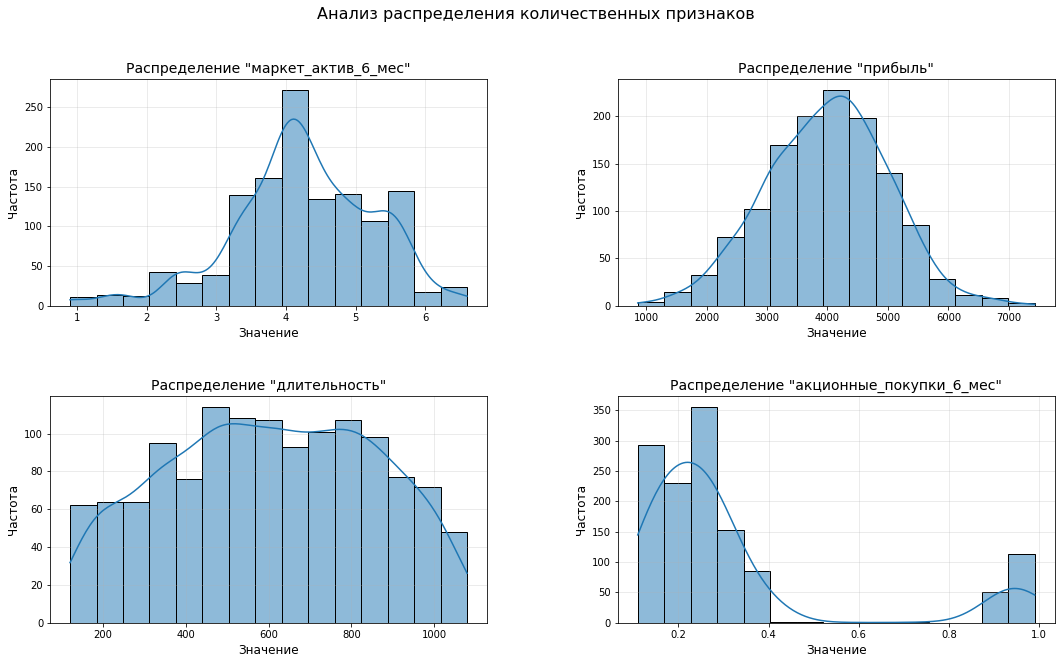

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def plot_continuous(data, column, ax, bins):
    sns.histplot(data[column], bins=bins, kde=True, ax=ax)
    ax.set_title(f'Распределение "{column}"', fontsize=14)
    ax.set_xlabel('Значение', fontsize=12)
    ax.set_ylabel('Частота', fontsize=12)
    ax.grid(alpha=0.3)

plot_continuous(df_info, 'маркет_актив_6_мес', axes[0, 0], 15)
plot_continuous(df_money, 'прибыль', axes[0, 1], 15)
plot_continuous(df_info, 'длительность', axes[1, 0], 15)
plot_continuous(df_info, 'акционные_покупки_6_мес', axes[1, 1], 15)


plt.suptitle('Анализ распределения количественных признаков', fontsize=16)
plt.show()

- Среднемесячное значение маркетинговых коммуникаций за 6 мес имеет нормальное распределение, среднее значение равна `4`;
- Распределение у длительности(сколько дней прошло с момента регистрации на сайте) показывает, что есть покупатели, которые зарегестрировались от `200 до 1000` дней назад, среднее значение - `600` дней назад;
- Акционные покупки от обычных в среднем имеют пропорцию `1 к 5`, но всё же есть покупатели, которые чаще всего покупают только акционные товары;
- В среднем каждый пользователь приносит около `3500-4800` прибыли.

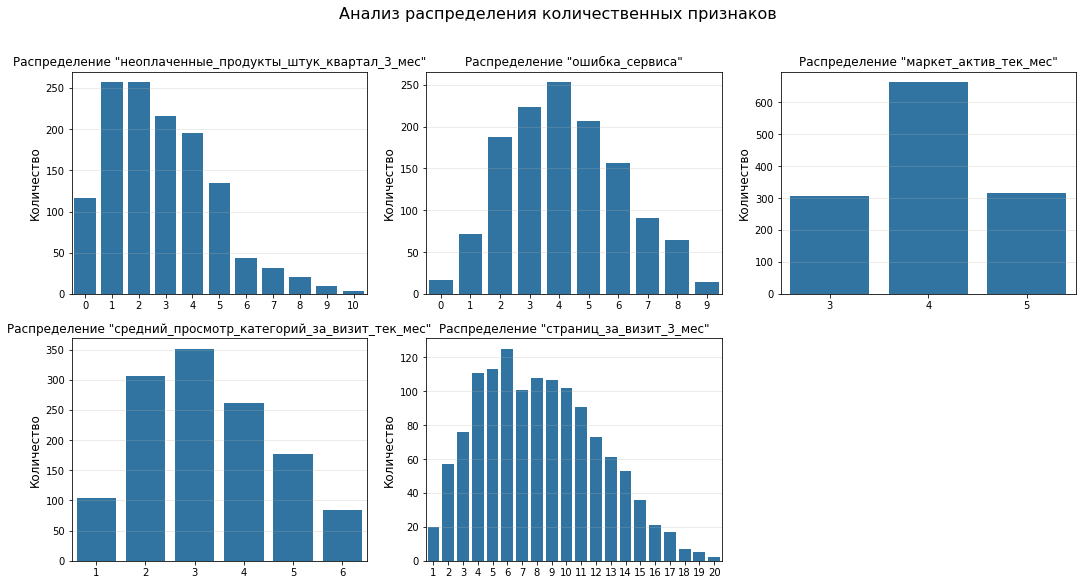

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
#plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.delaxes(axes[1, 2])

def plot_discrete(data, column, ax, top_n=None):  #функция для дискретных признаков
    sns.countplot(x=data[column], ax=ax) 
    ax.set_title(f'Распределение "{column}"', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Количество', fontsize=12)
#   ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plot_discrete(df_info, 'маркет_актив_тек_мес', axes[0, 2])
plot_discrete(df_info, 'ошибка_сервиса', axes[0, 1])
plot_discrete(df_info, 'неоплаченные_продукты_штук_квартал_3_мес', axes[0, 0])
plot_discrete(df_info, 'средний_просмотр_категорий_за_визит_тек_мес', axes[1, 0])
plot_discrete(df_info, 'страниц_за_визит_3_мес', axes[1, 1])

plt.suptitle('Анализ распределения количественных признаков', fontsize=16)
plt.show()

- Самые частое количество неоплаченных продуктов за 3 месяца - `1-3`;
- Чаще всего за визит пользователь просматривает `3 категории`;
- Ошибка сервиса в среднем возникала `4 раза` у каждого пользователя;
- За 3 месяца пользователь в среднем просматривает `от 4 до 10` страниц за визит.
- Количество маркетинговых коммуникаций в текущем месяце разделилась а 3 группы, самым высокое имеет среднее значение 4 ед.

**Выбросов нет - это хорошо. Далее рассмотрим другие количественные признакми в других датафреймах**

### Категориальные признаки

**Рассмотрим категориальные признаки и их соотношения.**

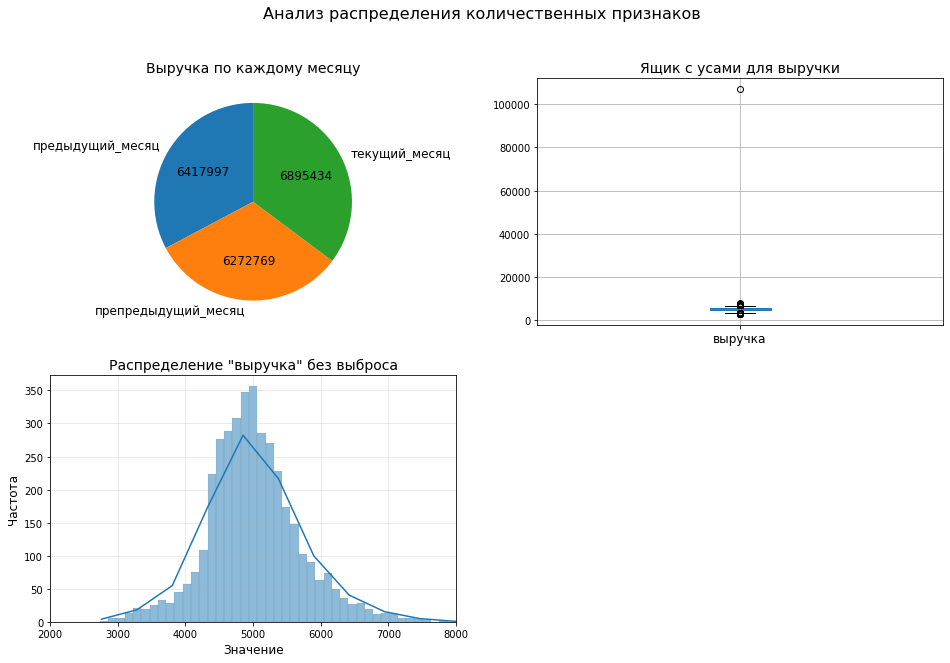

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
fig.delaxes(axes[1, 1])

df_r_group = df_revenue.groupby(by='период_выручки')['выручка'].sum()
ax = df_r_group.plot(kind='pie',
                y='период_выручки',
                labels=df_r_group.index,
                legend=False, 
                autopct=lambda x: '{:.0f}'.format(x * sum(df_r_group.values)/100),
                ax=axes[0, 0],
                textprops={'fontsize': 12},
                startangle=90)
axes[0, 0].set_ylabel('')
axes[0, 0].set_title('Выручка по каждому месяцу', fontsize=14)

df_revenue.boxplot('выручка',ax=axes[0, 1])
axes[0, 1].set_title('Ящик с усами для выручки', fontsize=14)
axes[0, 1].tick_params(axis='x', labelsize=12)

bins_filtered = np.linspace(2000, 8000, 50)
plot_continuous(df_revenue, 'выручка', axes[1, 0], bins_filtered)
axes[1, 0].set_xlim(2000, 8000)
axes[1, 0].set_title('Распределение "выручка" без выброса', fontsize=14)

plt.suptitle('Анализ распределения количественных признаков', fontsize=16)
plt.show()

In [27]:
df_revenue.query('`выручка` < 10000', inplace=True)

**Выручка с каждым месяцем росла, особенно заметна разница между последним и предпоследним месяцем. Так же есть `1` выброс с выручкой, удалим его. Среднее значение выручки около `5000`.**

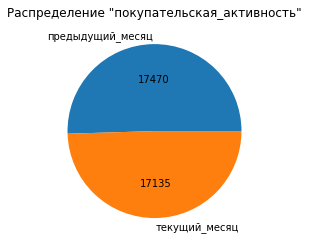

In [28]:
df_t_group = df_time.groupby(by='период_времени')['минут'].sum()
ax = df_t_group.plot(kind='pie',
                y='период_времени',
                labels=df_t_group.index,
                legend=False, 
                autopct=lambda x: '{:.0f}'.format(x * sum(df_t_group.values)/100))
ax.set_ylabel('');
plt.title('Распределение "покупательская_активность"');

**Количесвто минут немного упало, по сравнению с прошлым месяцем, но это не показатель, поэтому по не нему судить не будем. Пользователь за месяц в среднем проводит `17200` минут на сайте.**

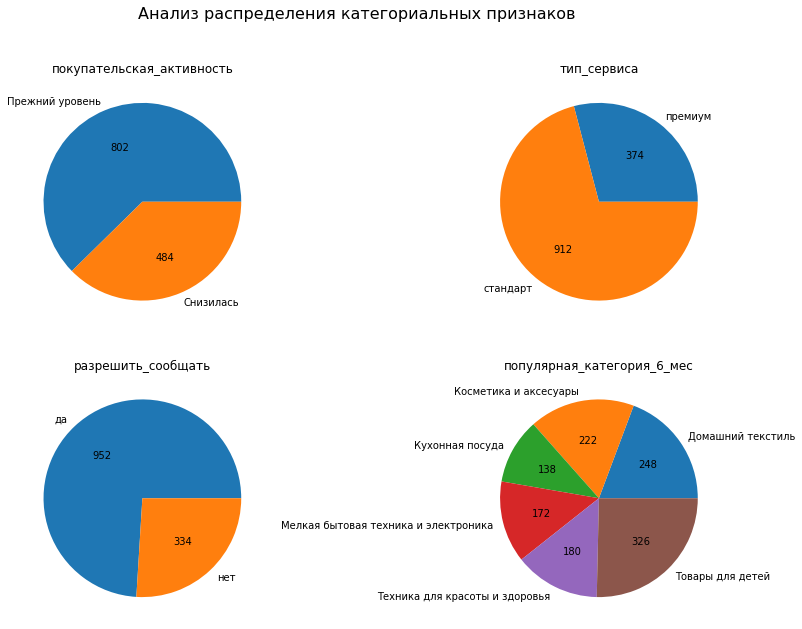

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_info_1 = df_info.groupby('покупательская_активность')['покупательская_активность'].count()
df_info_2 = df_info.groupby('тип_сервиса')['тип_сервиса'].count()
df_info_3 = df_info.groupby('разрешить_сообщать')['разрешить_сообщать'].count()
df_info_4 = df_info.groupby('популярная_категория_6_мес')['популярная_категория_6_мес'].count()

def inf_pie(name, i, j):
    name.plot(kind='pie',
             ylabel=(''),
             autopct=lambda x: '{:.0f}'.format(x * sum(name.values)/100),
             ax=axes[i, j])
    


inf_pie(df_info_1, 0, 0)
axes[0, 0].set_title('покупательская_активность')
inf_pie(df_info_2, 0, 1)
axes[0, 1].set_title('тип_сервиса')
inf_pie(df_info_3, 1, 0)
axes[1, 0].set_title('разрешить_сообщать')
inf_pie(df_info_4, 1, 1)
axes[1, 1].set_title('популярная_категория_6_мес')

plt.suptitle('Анализ распределения категориальных признаков', fontsize=16);

- У большинства клиентов покупательская активность осталась на прежнем уровне - `802 против 484`;
- Большая часть клиентов имеют тип сервиса стандарт с соотношением `3 к 1`, с таким же соотношением пользователи согласились на рассылки;
- Самая популярная категория за последние 6 месяцев это `товары для детей`, затем идут `домашний текстиль` и `касметика и аксесуары`;

**Подведём краткий вывод:**
- Почти все количественные признаки имеют `нормальное распределение`, кроме `маркет_актив_тек_мес` и `акционные_покупки_6_мес`, они разделились на `небольшие группы`;
- Пользователь в среднем получает `4 рассылки` за месяц, зарегестрировался около `600 дней` назад,  акционные покупки составляют `30%` от всех покупок, в корзине имеет `1-3 неоплаченные покупки`, за визит смотрит `3 категории`, встретился с ошибками около `4` раз во время посещений сайта, за 3 месяца просматривает от `4 до 11 страниц` за визит;
- Так же среднестатистический пользователь приносит около `4200 прибыли` и `5000 выручки` за пол года, имеет `стандартный тип сервиса`, `согласен на рассылки` и любимая категория - `товары для детей`;
- В сайте пользователи проводят около `17200 минут` в месяц, покупательская активность у большинства осталась на прежнем уровне(`802 из 1300`), средняя выручка за месяц `6.5млн`.

**Критических выбросов не обнаружено**

# Объединение таблиц

**Объединим датафреймы `df_file`, `df_revenue`, `df_time`. Данные о прибыли из `df_money` при моделировании нам не понадобятся. Так же учтём тот момент, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.**

In [30]:
df_revenue_new = df_revenue.pivot_table(index=df_revenue.index, columns='период_выручки', values='выручка')
df_time_new = df_time.pivot_table(index=df_time.index, columns='период_времени', values='минут')
display(df_revenue_new.info())
df_time_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц     1297 non-null   float64
 1   препредыдущий_месяц  1297 non-null   float64
 2   текущий_месяц        1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   предыдущий_месяц  1297 non-null   float64
 1   текущий_месяц     1297 non-null   float64
dtypes: float64(2)
memory usage: 30.4 KB


**Готово, значения теперь являются столбцами. Приступим к объединению.**

In [31]:
df = df_revenue_new.join(df_time_new, how='inner', lsuffix='_выручки', rsuffix='_времени')
df = df.join(df_info, how='inner')
df['текущий_месяц_выручки'] = df['текущий_месяц_выручки'].fillna(
    df['текущий_месяц_выручки'].median()
)
display(df.head())
i, j = df.shape
print(f'Количество строк - {i}. Количество столбцов - {j}')
df.isna().sum()

,предыдущий_месяц_выручки,препредыдущий_месяц,текущий_месяц_выручки,предыдущий_месяц_времени,текущий_месяц_времени,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки_6_мес,популярная_категория_6_мес,средний_просмотр_категорий_за_визит_тек_мес,неоплаченные_продукты_штук_квартал_3_мес,ошибка_сервиса,страниц_за_визит_3_мес
id,,,,,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12.0,10.0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,5457.5,4826.0,5058.4,8.0,13.0,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,6158.0,4793.0,6610.4,11.0,13.0,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,5807.5,4594.0,5872.5,8.0,11.0,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,4738.5,5124.0,5388.5,10.0,10.0,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


Количество строк - 1286. Количество столбцов - 17


предыдущий_месяц_выручки                       0
препредыдущий_месяц                            0
текущий_месяц_выручки                          0
предыдущий_месяц_времени                       0
текущий_месяц_времени                          0
покупательская_активность                      0
тип_сервиса                                    0
разрешить_сообщать                             0
маркет_актив_6_мес                             0
маркет_актив_тек_мес                           0
длительность                                   0
акционные_покупки_6_мес                        0
популярная_категория_6_мес                     0
средний_просмотр_категорий_за_визит_тек_мес    0
неоплаченные_продукты_штук_квартал_3_мес       0
ошибка_сервиса                                 0
страниц_за_визит_3_мес                         0
dtype: int64

**Теперь готовый датафрейм имеет `17 признаков` и `1286 строк`, `id` пользователя стал индексом.**

# Корреляционный анализ

**Посмотрим на корреляцию между количественными признаками.**

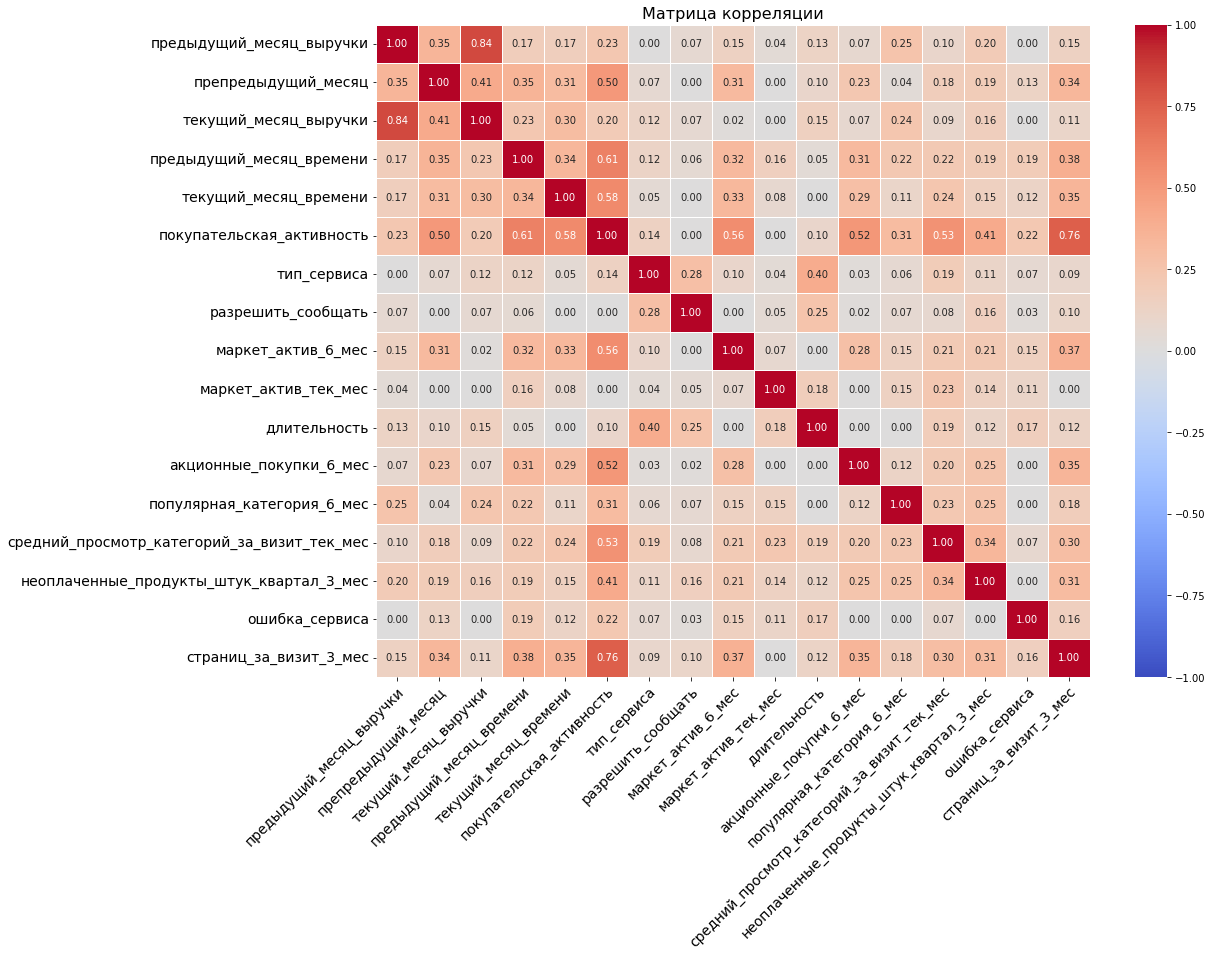

In [32]:
interval_cols = [
    'маркет_актив_6_мес', 
    'длительность', 
    'акционные_покупки_6_мес', 
    'препредыдущий_месяц', 
    'предыдущий_месяц_выручки', 
    'текущий_месяц_выручки'
]

pm = phik_matrix(df, interval_cols=interval_cols)

plt.figure(figsize=(16, 12))
sns.heatmap(
    pm, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt='.2f',
    vmin=-1, 
    vmax=1,
    linewidths=0.5
)
plt.xticks(
    rotation=45, 
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)
plt.title('Матрица корреляции', fontsize=16)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0);

**Будем считать, что мультиколлениарность есть, если корреляция больше `0.8`. У нас есть пара с корреляцией `0.84` - `предыдущий_месяц_выручки` и `текущий_месяц_выручки`, удалим второй признак, ведь он немного меньше связан с целевым. Теперь стоит рассмотреть график корреляции с другими категориальными признаками, сгруппировав целевой `покупательская_активность`.**

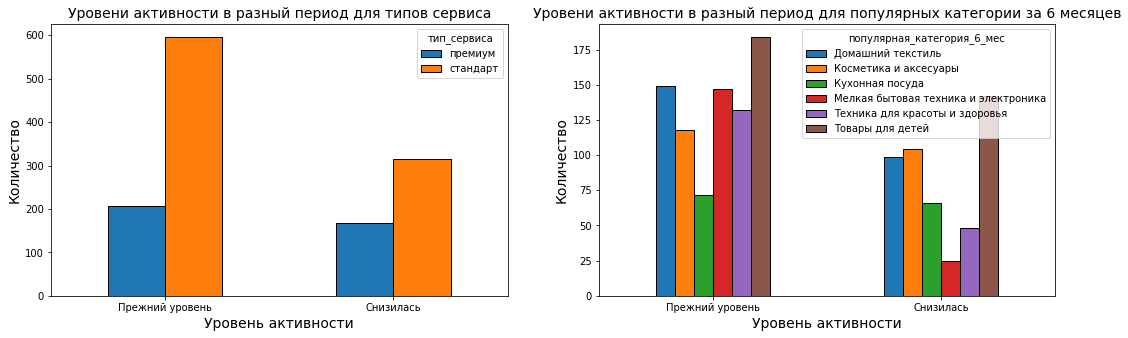

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

q1 = df.pivot_table(index='покупательская_активность', columns='тип_сервиса', aggfunc='size')
q1.plot(kind='bar', edgecolor='black', ax=axes[0])
axes[0].set_title('Уровени активности в разный период для типов сервиса', fontsize=14)
axes[0].set_xticklabels(q1.index, rotation=0)
axes[0].set_ylabel('Количество', fontsize=14)
axes[0].set_xlabel('Уровень активности', fontsize=14)

q2 = df.pivot_table(index='покупательская_активность', columns='популярная_категория_6_мес', aggfunc='size')
q2.plot(kind='bar', edgecolor='black', ax=axes[1])
axes[1].set_title('Уровени активности в разный период для популярных категории за 6 месяцев', fontsize=14)
axes[1].set_xticklabels(q1.index, rotation=0)
axes[1].set_ylabel('Количество', fontsize=14)
axes[1].set_xlabel('Уровень активности', fontsize=14);

**Почти у половины пользователей с типом сервиса премиум уровень активности снизился, но у пользователей с типом стандарт не так сильно это проявляется, снизилось примерно 1/3 от общего количества. Категория товаров мелкая бытовая техника и электроника меньше всего подверглась снижению покупательной активности, остальные так или иначе стали хуже продаваться.**

# Использование пайплайнов

**Создадим пайплайн, который будет проверять 4 модели: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC` с различными гипепараметрами, так же будем использовать два кодировщика:`OneHotEncoder` и `OrdinalEncoder` для категориальных признаков и три скейлера для масштабирования количественных:`RobustScaler`, `MinMaxScaler` и `StandardScaler`**, 

**Колонку `акционные_покупки_6_мес` переделаем следующим образом: если число больше `0.6`, то впишем `высокий`, если ниже, то `низкий`. Среднее значение `~0.3`, умножим его в два раза и возьмём данный порог. `60%` является значительной долей покупок, что свидетельствует о явной склонности клиента реагировать на акции.**

In [34]:
df['уровень_акционных_покупок_6_мес'] = np.where(df['акционные_покупки_6_мес'] > 0.6, 'высокий', 'низкий')
df.drop(['акционные_покупки_6_мес'], axis=1, inplace=True)
df.head()

,предыдущий_месяц_выручки,препредыдущий_месяц,текущий_месяц_выручки,предыдущий_месяц_времени,текущий_месяц_времени,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория_6_мес,средний_просмотр_категорий_за_визит_тек_мес,неоплаченные_продукты_штук_квартал_3_мес,ошибка_сервиса,страниц_за_визит_3_мес,уровень_акционных_покупок_6_мес
id,,,,,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12.0,10.0,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,высокий
215350,5457.5,4826.0,5058.4,8.0,13.0,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,низкий
215351,6158.0,4793.0,6610.4,11.0,13.0,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,высокий
215352,5807.5,4594.0,5872.5,8.0,11.0,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,высокий
215353,4738.5,5124.0,5388.5,10.0,10.0,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,низкий


**Создадим пайплайны и найдём лучшую модель с лучшими гипепараметрами.**

In [35]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(df.drop(['покупательская_активность'], axis=1), 
                                                    df['покупательская_активность'],
                                                    test_size=0.25,
                                                    random_state = RANDOM_STATE,
                                                    stratify = df['покупательская_активность'])

In [36]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [37]:
num_col = ['предыдущий_месяц_выручки',        #отбираем количественные признаки
           'препредыдущий_месяц', 
           'текущий_месяц_выручки', 
           'предыдущий_месяц_времени', 
           'текущий_месяц_времени', 
           'маркет_актив_6_мес', 
           'маркет_актив_тек_мес', 
           'длительность', 
           'средний_просмотр_категорий_за_визит_тек_мес', 
           'неоплаченные_продукты_штук_квартал_3_мес', 
           'ошибка_сервиса', 
           'страниц_за_визит_3_мес']

ohe_col = ['популярная_категория_6_мес',      #отбираем категориальные признаки 
          ]

ord_col = ['уровень_акционных_покупок_6_мес', #отбираем категориальные признаки 
           'тип_сервиса',
           'разрешить_сообщать']

In [38]:
pipe_ohe = Pipeline([                         #пайплайн для кодирования
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
])

In [39]:
pipe_ord = Pipeline([                         #пайплайн для кодирования
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[
                                    ['низкий', 'высокий'],
                                    ['стандарт', 'премиум'],
                                    ['нет', 'да']],
                         handle_unknown='use_encoded_value',
                         unknown_value = np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer([       #пайплайн для масштабирования и кодирования
    ('ohe', pipe_ohe, ohe_col),
    ('ord', pipe_ord, ord_col),
    ('num', MinMaxScaler(), num_col)],
    remainder = 'passthrough')

pipe_final = Pipeline([                       #итоговый пайплайн
    ('preprocessor', data_preprocessor),
    ('models', None)
])

param_grid = [
    {
    'models': [KNeighborsClassifier()],
    'models__n_neighbors': range(2, 40),
    'models__weights': ['uniform', 'distance'],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(3, 20),
    'models__min_samples_split': [2, 5, 10],
    'models__class_weight': ['balanced', None],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [LogisticRegression(random_state=RANDOM_STATE)],
    'models__penalty': ['l1', 'l2'],
    'models__solver': ['liblinear', 'saga'],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [SVC(random_state=RANDOM_STATE, probability=True)],
    'models__kernel': ['linear', 'rbf', 'poly'],
    'models__gamma': ['scale', 'auto', 0.01, 0.1],
    'models__degree': [2, 3, 4],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [40]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

**Почему мы выбрали именно `AUC-ROC`? Потому что он легко интерпретируется и подходит для сравнения разных моделей.**

**Готово, теперь мы сможем найти лучшую модель.**

In [41]:
randomized_search.fit(X_train, y_train)
display(f'Лучшая модель:', randomized_search.best_estimator_)
display('Среднее значение метрики при кросс-валидации:', randomized_search.best_score_)

'Лучшая модель:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория_6_мес']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequen...
                                                   'препредыдущий_месяц',
                                                   'текущий_месяц_выручки',
                                                   'предыдущий_месяц_времени',
                                                   'текущий_месяц_времени',
                                                   'маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'средний_просмотр_категорий_за_визит_тек_мес',
                                                   'неоплаченные_продукты_штук_квартал_3_мес',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит_3_мес'])])),
                ('models',
                 KNeighborsClassifier(n_neighbors=13, weights='distance'))])

'Среднее значение метрики при кросс-валидации:'

np.float64(0.9139619459082731)

In [42]:
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
display(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')
display(f'Лучшие параметры: {randomized_search.best_params_}')

'Метрика ROC-AUC на тестовой выборке: 0.9008881213765881'

"Лучшие параметры: {'preprocessor__num': StandardScaler(), 'models__weights': 'distance', 'models__n_neighbors': 13, 'models': KNeighborsClassifier()}"

**Готово, лучшая модель - `K-ближайших соседей`, модель показала хорошие результаты на тестовой выборке - `0.90%`, лучшие параметры:** 
- Метод масштабирования - `StandardScaler`;
- n_neighbors - `13`;
- weights - `distance`.

**Далее подробно изучим саму модель.**

# Анализ важности признаков

**Оценим важность признаков для нашей модели и постройте график важности с помощью метода `SHAP`. Определим, какие признаки больше всего влияют на модель. Для этого нужно "достать" итоговую модель из пайплана.**

In [43]:
X_train_new = data_preprocessor.fit_transform(X_train)
X_test_new = data_preprocessor.transform(X_test)

In [44]:
def get_ct_feature_names(ct):
    """Получаем имена признаков после ColumnTransformer"""
    feature_names = []
    
    for name, transformer, columns in ct.transformers_:
        if transformer == 'drop':
            continue
            
        if isinstance(transformer, Pipeline):
            transformer = transformer.steps[-1][1]
            
        try:
            if hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(columns)
            elif hasattr(transformer, 'get_feature_names'):
                names = transformer.get_feature_names(columns)
            else:
                names = columns
                
            feature_names.extend(names)
        except AttributeError:
            feature_names.extend(columns)
            
    return feature_names

feature_names = get_ct_feature_names(data_preprocessor)

X_train_df = pd.DataFrame(X_train_new, columns=feature_names)
X_test_df = pd.DataFrame(X_test_new, columns=feature_names)

In [45]:
shap_sample = shap.sample(X_train_df, nsamples=100, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(
    randomized_search.best_estimator_.named_steps['models'].predict_proba,
    shap_sample,
    feature_names=feature_names
)

exp = explainer(shap_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

## Bar

**Начнём с первого графика `SHAP` - `shap.plots.bar`.**

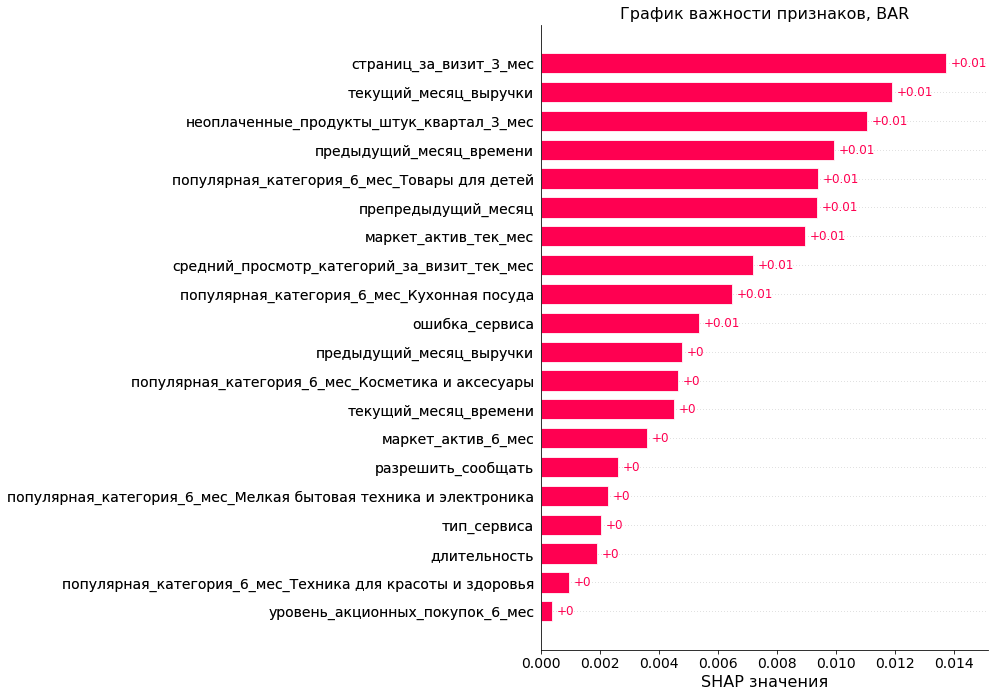

In [46]:
shap.plots.bar(exp[:, :, 1], max_display=20, show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP значения", fontsize=16)
ax.set_title('График важности признаков, BAR', fontsize=16)

plt.show()

**Cамый влиятельные признаки:**
- `страниц_за_визит_3_мес`;
- `текущий_месяц_выручки`;
- `неоплаченные_продукты_штук_квартал_3_мес`.

**Cамый не влиятельные признаки:**
- `длительность`;
- `популярная_категория_6_мес_Техника для красоты и здоровья`;
- `уровень_акционных_покупок_6_мес`.

## Beeswarm

**Далее идёт график `SHAP` - `shap.plots.beeswarm`.**

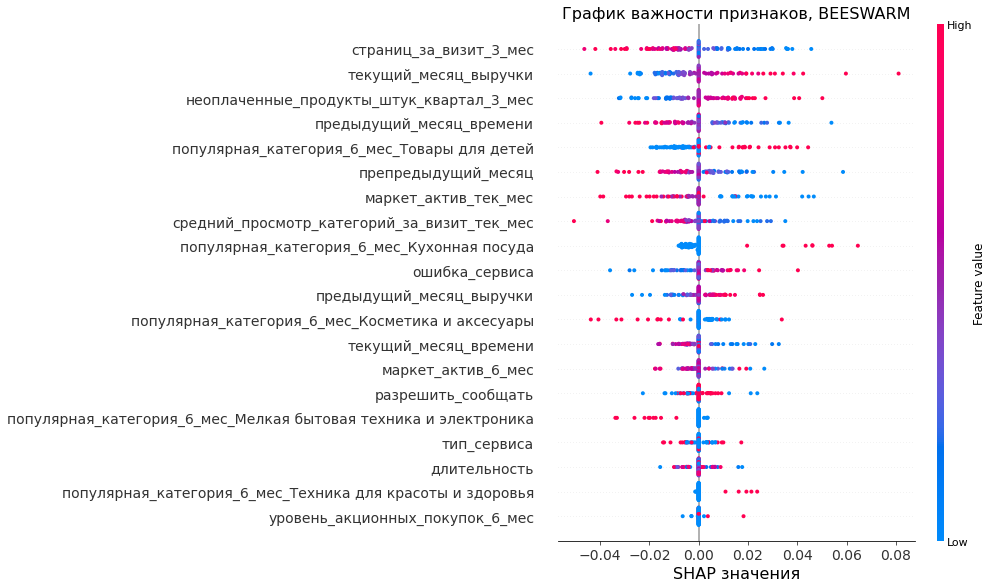

In [47]:
shap.plots.beeswarm(exp[:, :, 1], max_display=20, show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP значения", fontsize=16)
ax.set_title('График важности признаков, BEESWARM', fontsize=16)

plt.show()

**Вспомним, чем краснее точка, тем больше значение у наблюдения, можем заметить:**
- чем больше просмотренных страниц за визит сделал человек(за 3 месяце), тем больше вероятность того, что у него снизится активность;
- чем больше выручки принёс пользователь за месяц, тем вероятнее у него снизится активность;
- чем больше неоплаченных товаров в корзине за последние 3 месяце есть у пользователя, тем выше вероятность снижения активности.

## Waterfall

**И последний график - `shap.plots.waterfall`.**

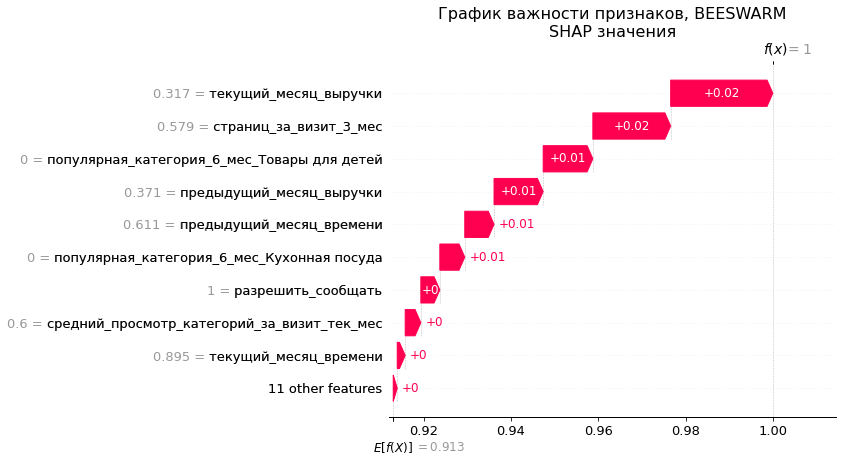

In [48]:
shap.plots.waterfall(exp[51, :, 0], show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP значения", fontsize=16)
ax.set_title('График важности признаков, BEESWARM', fontsize=16)

plt.show()

**Самые важные факторы снижения:**
- текущий_месяц_времени = 0.895(максимальный вклад в снижение) - возможно, клиент тратил слишком много времени в текущем месяце на поиск товара;
- средний_просмотр_категорий = 0.6 - активный просмотр без покупок;
- предыдущий_месяц_времени = 0.611 - повторяющаяся активность в прошлом;
- страниц_за_визит_3_мес = 0.579 при этом снижает активность.

**Предполагаем, что человек очень долго ищет нужный товар и не находит его, большие просмотры и большое количество нахождения на сайте могут привести человека к снижению покупательской активности, так как нужного товара он не находит. Так же мы заметили, если в текущем месяце пользователь принёс много выручки, вероятнее всего у него тоже снизится активность, скорее всего это связано с тем, что он уже купил нужные товары на большую сумму и времено не будет совершать покупки.**

# Сегментация покупателей

## Высокие акционные покупки

**Выберем покупателей, у которых высокие акционные покупки.**

In [49]:
all_probabilities = randomized_search.predict_proba(df.drop('покупательская_активность', axis=1))[:, 1]

df['вероятность_снижения'] = all_probabilities
df['вероятность_снижения'] = df['вероятность_снижения'].round(4)  # Округляем до 4 знаков

In [54]:
df

,предыдущий_месяц_выручки,препредыдущий_месяц,текущий_месяц_выручки,предыдущий_месяц_времени,текущий_месяц_времени,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория_6_мес,средний_просмотр_категорий_за_визит_тек_мес,неоплаченные_продукты_штук_квартал_3_мес,ошибка_сервиса,страниц_за_визит_3_мес,уровень_акционных_покупок_6_мес,вероятность_снижения
id,,,,,,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12.0,10.0,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,высокий,0.8474
215350,5457.5,4826.0,5058.4,8.0,13.0,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,низкий,1.0000
215351,6158.0,4793.0,6610.4,11.0,13.0,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,высокий,0.4666
215352,5807.5,4594.0,5872.5,8.0,11.0,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,высокий,1.0000
215353,4738.5,5124.0,5388.5,10.0,10.0,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,низкий,0.8443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,3664.0,4704.0,4741.7,14.0,7.0,Прежний уровень,стандарт,да,6.6,3,318,Техника для красоты и здоровья,5,3,3,11,низкий,0.0000
216644,4729.0,5299.0,5353.0,12.0,11.0,Прежний уровень,стандарт,нет,5.1,4,454,Домашний текстиль,6,2,3,9,низкий,0.0000
216645,5160.0,5334.0,5139.2,12.0,18.0,Прежний уровень,стандарт,да,4.1,3,586,Домашний текстиль,3,2,5,7,низкий,0.0000


,текущий_месяц_выручки,предыдущий_месяц_выручки,препредыдущий_месяц
покупательская_активность,,,
Прежний уровень,172332.6,161410.0,163746.0
Снизилась,699003.0,658649.5,618218.0


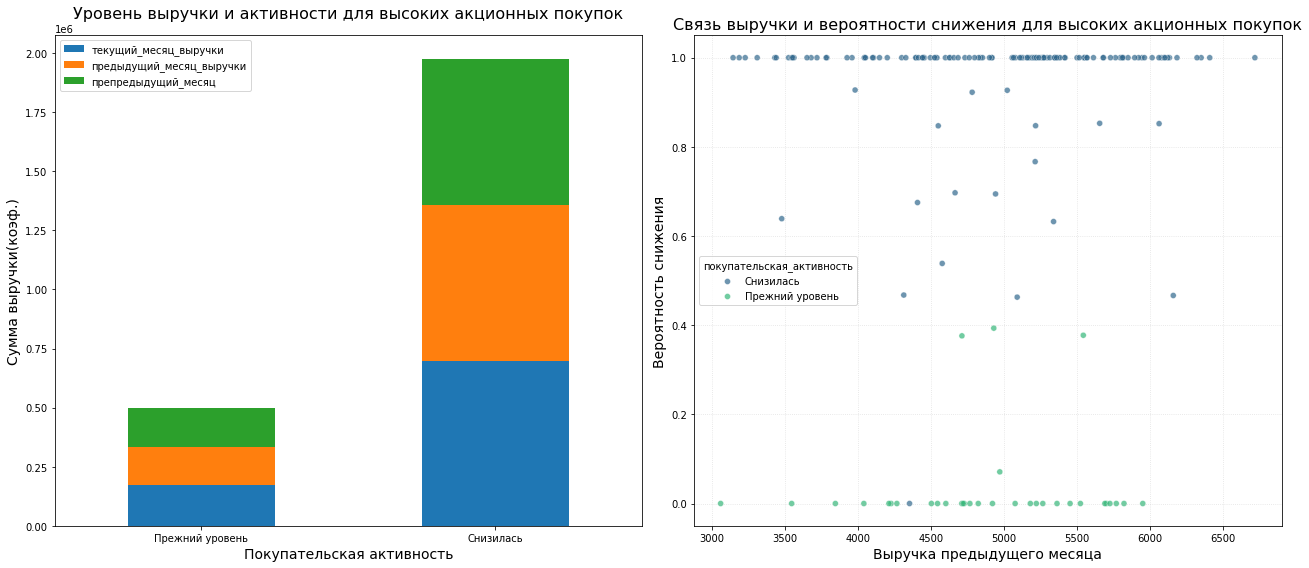

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

df_new_1 = df[df['уровень_акционных_покупок_6_мес'] == 'высокий']
df_agg_1 = df_new_1.groupby('покупательская_активность').agg({
    'текущий_месяц_выручки': 'sum',
    'предыдущий_месяц_выручки': 'sum',
    'препредыдущий_месяц': 'sum'
})
display(df_agg_1)
df_agg_1.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Уровень выручки и активности для высоких акционных покупок', fontsize=16)
axes[0].set_ylabel('Сумма выручки(коэф.)', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Покупательская активность', fontsize=14)

sns.scatterplot(
    data=df_new_1,
    x='предыдущий_месяц_выручки',
    y='вероятность_снижения',
    hue='покупательская_активность',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('Связь выручки и вероятности снижения для высоких акционных покупок', fontsize=16)
axes[1].set_xlabel('Выручка предыдущего месяца', fontsize=14)
axes[1].set_ylabel('Вероятность снижения', fontsize=14)
axes[1].grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

**Можем заметить, что у пользователей с высокой покупательской активностью после идёт снижение, есть вероятность, что во время больших акции(Черная Пятница, 11.11, новогодние скидки и т.д.) они закупаются на большие суммы по скидке, после чего 'пропадают' с площадки до следующих акции, таким категориям пользователей стоит предлагать небольшие скидки в течение всего года, чтобы постоянно подпитывать их интерес к покупкам - если хотим постоянно удерживать пользователя на площадке и постоянно сколять к покупкам. С другой стороны, такие покупатели всё равно вернутся через некоторое время. Так же заметили некую связь - если в предыдущем месяце большая активность по покупакам(особенно больше средней выручки в 5000), то у пользователей снизится активность.**

## Высокая выручка

**Вспомним, средняя выручка равна 5000, давайте рассмотрим пользователей, у которых выручка больше 5500 в двух из трёх месяцев.**

,текущий_месяц_выручки,предыдущий_месяц_выручки,препредыдущий_месяц
,sum,sum,sum
покупательская_активность,,,
Прежний уровень,779753.5,703788.0,616208.0
Снизилась,791857.6,733413.5,591040.0


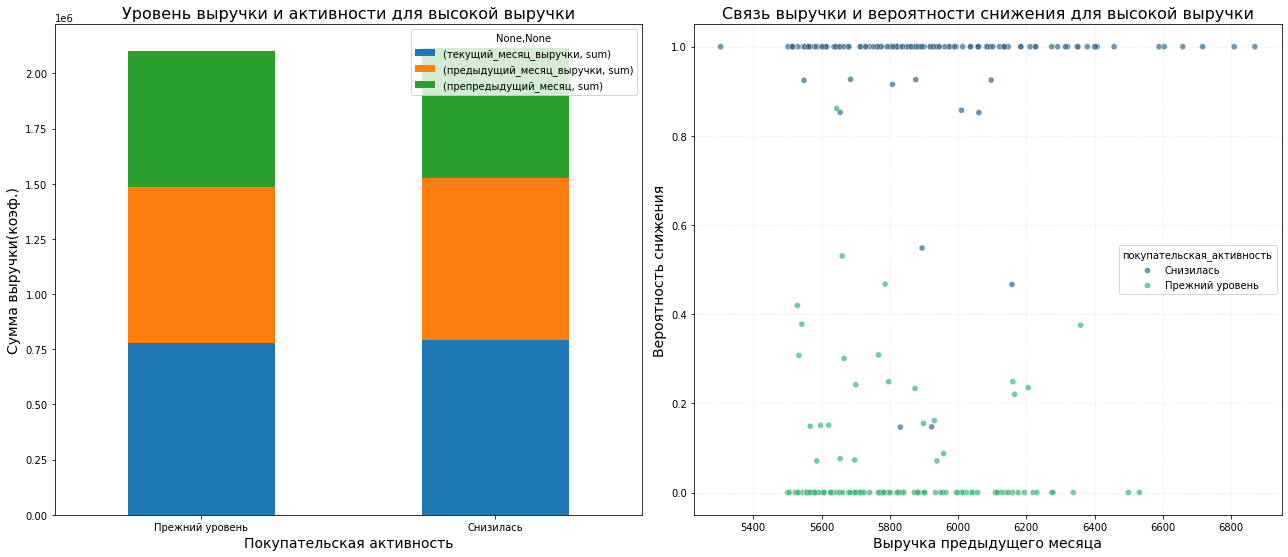

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

condition = (
    (df['текущий_месяц_выручки'] > 5500).astype(int) +
    (df['предыдущий_месяц_выручки'] > 5500).astype(int) + 
    (df['препредыдущий_месяц'] > 5500).astype(int)
) >= 2

df_new_2 = df[condition]
df_agg_2 = df_new_2.groupby('покупательская_активность').agg({
    'текущий_месяц_выручки': ['sum'],
    'предыдущий_месяц_выручки': ['sum'],
    'препредыдущий_месяц': ['sum']})
display(df_agg_2)
df_agg_2.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Уровень выручки и активности для высокой выручки', fontsize=16)
axes[0].set_ylabel('Сумма выручки(коэф.)', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Покупательская активность', fontsize=14)

sns.scatterplot(
    data=df_new_2,
    x='предыдущий_месяц_выручки',
    y='вероятность_снижения',
    hue='покупательская_активность',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('Связь выручки и вероятности снижения для высокой выручки', fontsize=16)
axes[1].set_xlabel('Выручка предыдущего месяца', fontsize=14)
axes[1].set_ylabel('Вероятность снижения', fontsize=14)
axes[1].grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

**Графики абсолютно идентичны, по данному сегменту покупателей лучше не давать рекомендации и делать выводы, но стоит заметить, что выручка росла у всех категории пользователей.**

## Техника

**Взглянем на группу клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.**

,текущий_месяц_выручки,предыдущий_месяц_выручки,препредыдущий_месяц
,sum,sum,sum
покупательская_активность,,,
Прежний уровень,773448.1,736675.0,722049.0
Снизилась,137043.2,129699.5,118418.0


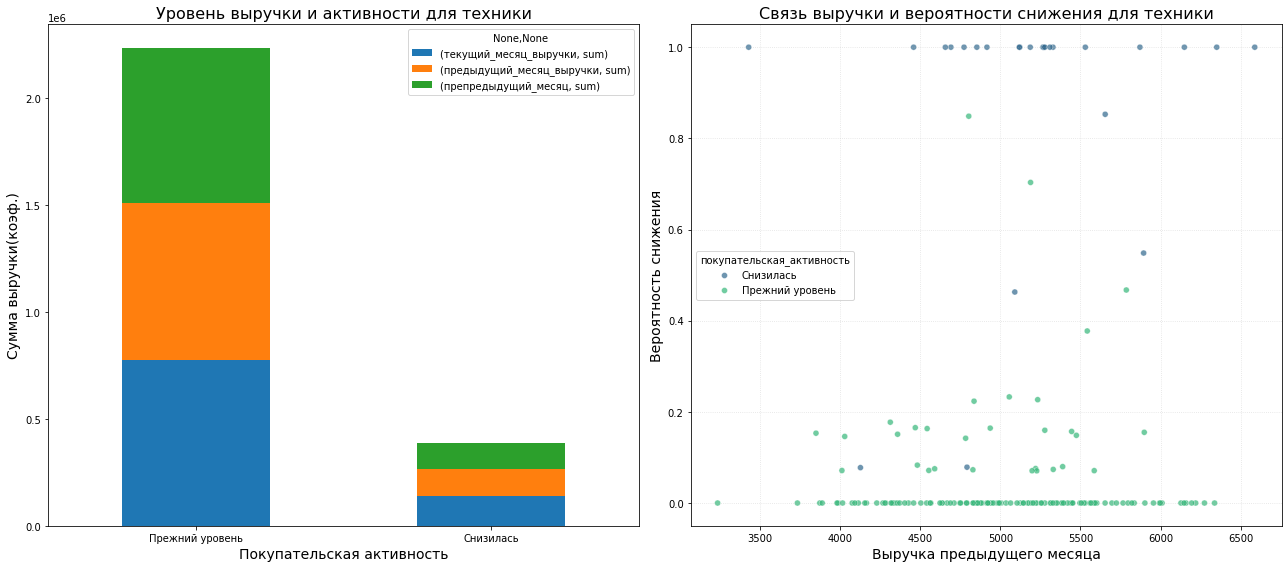

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

df_new_3 = df[df['популярная_категория_6_мес'] == 'Мелкая бытовая техника и электроника']
df_agg_3 = df_new_3.groupby('покупательская_активность').agg({
    'текущий_месяц_выручки': ['sum'],
    'предыдущий_месяц_выручки': ['sum'],
    'препредыдущий_месяц': ['sum']})
display(df_agg_3)
df_agg_3.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Уровень выручки и активности для техники', fontsize=16)
axes[0].set_ylabel('Сумма выручки(коэф.)', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Покупательская активность', fontsize=14)

sns.scatterplot(
    data=df_new_3,
    x='предыдущий_месяц_выручки',
    y='вероятность_снижения',
    hue='покупательская_активность',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('Связь выручки и вероятности снижения для техники', fontsize=16)
axes[1].set_xlabel('Выручка предыдущего месяца', fontsize=14)
axes[1].set_ylabel('Вероятность снижения', fontsize=14)
axes[1].grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

,текущий_месяц_выручки,предыдущий_месяц_выручки,препредыдущий_месяц
,sum,sum,sum
покупательская_активность,,,
Прежний уровень,773448.1,736675.0,722049.0
Снизилась,137043.2,129699.5,118418.0


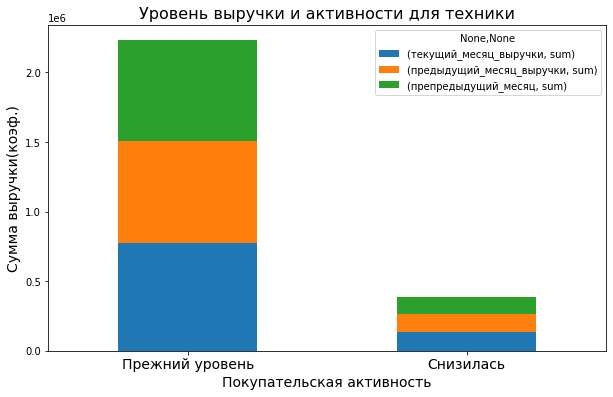

In [53]:
df_new_3 = df[df['популярная_категория_6_мес'] == 'Мелкая бытовая техника и электроника']
df_new_3 = df_new_3.groupby('покупательская_активность').agg({
    'текущий_месяц_выручки': ['sum'],
    'предыдущий_месяц_выручки': ['sum'],
    'препредыдущий_месяц': ['sum']})

display(df_new_3)
df_new_3.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Уровень выручки и активности для техники', fontsize=16)
plt.ylabel('Сумма выручки(коэф.)', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Покупательская активность', fontsize=14)
plt.show()

**У данного сегмента покупателей очень слабое снижение активности - это хорошо. Но казалось бы, технику покупают намного реже, чем обычные товары для жизни, так же стоит заметить хорошую суммарную выручку, за таких клиентов стоит держаться.**

# Вывод

**Подведём краткие выводы по каждому пункту и дадим общую рекомендацию интернет-магазину «В один клик».**

**Выбросов и пропусков почти не было, данные были хорошо готовы для работы, так же стоит вспомнить, что мы брали только тех пользователей, которые совершали покупки в каждом из последних трёх месяцев.**

**Исследовательский анализ:**
- Среднемесячное значение маркетинговых коммуникаций равна `4`;
- В среднем, каждый пользователь заргестрировался `600` дней назад;
- Акционные покупки от обычных имеют пропорцию `1 к 5`;
- Пользователь приносит около `3500-4800` прибыли;
- Частое количество неоплаченных продуктов за 3 месяца - `1-3`;
- За визит пользователь просматривает около `3 категории`;
- У пользователя ошибка сервиса в среднем возникала `4 раза`;
- За 3 месяца пользователь в среднем просматривает `от 4 до 10` страниц за визит;
- Средняя выручка равна `5000`.
- Пользователь за месяц в среднем проводит `17200` минут на сайте.
- У большинства пользователей покупательская активность осталась на `прежнем уровне`, так же большинство `согласились` на рассылки;
- Самая популярная категория - `Товары для детей`.

**Лучшая модель - `метод ближайших соседей` со следующими гиперпараметрами:**
- preprocessor__num: `StandardScaler`;
- models__weights: `distance`;
- models__n_neighbors: `13`.

**Самые важные признаки - по большей части именно от них зависит, снизится или останется на прежнем уровне покупательская активность пользователя:**
- `страниц_за_визит_3_мес`;
- `текущий_месяц_выручки`;
- `неоплаченные_продукты_штук_квартал_3_мес`.

**Так же мы посмотрели разные сегменты покупателей и можем сделать общий вывод:**
- Если есть цель постоянно принуждать пользователя с высоким коэффицентом акционных покупок - стоит вводить для них специальные акции, главное, не перегнуть палку и полностью не отбить желание что-либо покупать по акции;
- Стоит добавить на сайт ИИ ассистента для поиска нужного товара для пользователя, иначе, после долгого поиска, у человека пропадает желание совершать покупку;
- Так же стоит собирать от пользователей обратную связь по работе сайта и узнавать, какие товары они хотели бы видеть на сайте;
- На небольшом количестве пользователей можно попробовать провести эксперимент - при возможном снижении активности предлагать скидки, если это поможет удержать клиента, ввести на постоянную основку, главное, знать меру в скидках, чтобы не работать в убыток.